# Titanic Survival Analysis

In this notebook, we're going to analyze the Titanic dataset and build machine learning models to predict whether a passenger survived or not based on features like passenger class, sex, and age.

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


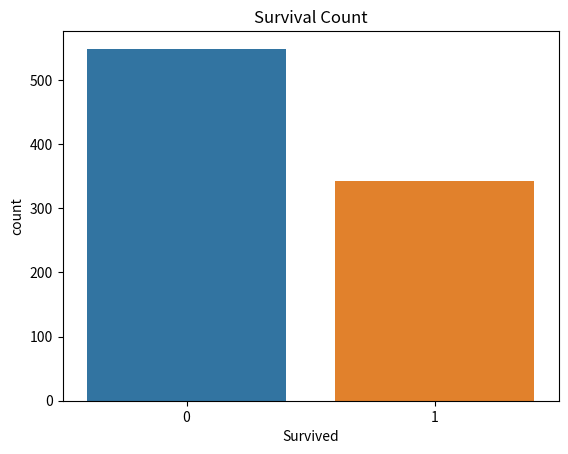

In [ ]:
# Importing necessary libraries
# pandas for data manipulation, matplotlib and seaborn for data visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# pd.read_csv is a simple and efficient function to load structured data files into pandas dataframes
df = pd.read_csv('Titanic-Dataset.csv')

# Display the first few rows of the dataframe
# df.head() is a convenient way to visualize the data we're working with
df.head()

# Basic analysis
# df.describe() provides descriptive statistics of the dataframe
print(df.describe())

# Visualization
# seaborn's countplot function makes it easy to visualize categorical data counts
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Display the first few rows of the dataframe
df.head()

## Basic Analysis

We use `df.describe()` to get descriptive statistics of the dataframe. This gives us a sense of the distribution of values within each feature.

## Data Visualization

We use seaborn's `countplot` function to visualize the count of survivors. This gives us a sense of the proportion of passengers who survived and who didn't.


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


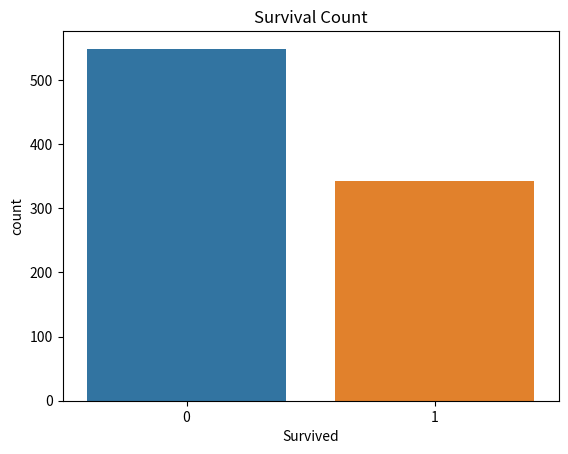

In [ ]:
# Basic analysis
print(df.describe())

# Visualization
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

## Data Preprocessing

Before we can train our machine learning models, we need to preprocess our data. This includes handling missing values and converting categorical data to numerical. We fill missing age values with the mean age. We also convert the 'Sex' feature to numerical using `LabelEncoder`.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Handle missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Convert categorical data to numerical
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

## Feature Selection

We select 'Pclass', 'Sex', and 'Age' as our features and 'Survived' as our target. The choice of these features is based on our understanding of the problem domain. We believe that passenger class, sex, and age might have influenced a passenger's chances of survival.

## Splitting the Data

We split our data into training and test sets. The training set is used to train our models, and the test set is used to evaluate their performance.

## Model Training

We train three different models - Logistic Regression, Decision Tree, and Random Forest. Each of these models has its strengths and weaknesses, and they use different algorithms to learn from the data.

In [ ]:
# Select features and target
X = df[['Pclass', 'Sex', 'Age']]
y = df['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Evaluation

We evaluate our models using accuracy score, which is the proportion of correct predictions out of total predictions. It's a common metric for classification problems.

In [ ]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Print the accuracies
print('Logistic Regression Accuracy:', lr_accuracy)
print('Decision Tree Accuracy:', dt_accuracy)
print('Random Forest Accuracy:', rf_accuracy)

Logistic Regression Accuracy: 0.8100558659217877
Decision Tree Accuracy: 0.776536312849162
Random Forest Accuracy: 0.7821229050279329


## Making Predictions

Finally, we define a function to make predictions using our trained Logistic Regression model. This function takes age, sex, and passenger class as input and returns whether the passenger would have survived or not.

In [ ]:
from enum import Enum

class Pclass(Enum):
    First = 1
    Second = 2
    Third = 3

def predict_survival(age, sex, pclass):
    # Convert sex to numerical value
    sex = 1 if sex.lower() == 'male' else 0

    # Convert pclass to numerical value
    pclass = pclass.value

    # Make prediction
    prediction = lr.predict([[pclass, sex, age]])

    # Return prediction
    return 'Survives' if prediction[0] == 1 else 'Does not survive'

# Predict whether the passenger survives or not
print(predict_survival(25, 'female', Pclass.First))

Survives


## Model Saving

After training and evaluating our models, we save the best performing model for future use. We use `pickle` to serialize our model and save it to disk. This allows us to load the model later and use it to make predictions without having to retrain it.

In [ ]:
import pickle

# Save the trained Logistic Regression model to a pickle file
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(lr, file)

In [ ]:
import pickle
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# Load the model from the pickle file
with open('logistic_regression_model.pkl', 'rb') as file:
    lr_model = pickle.load(file)

# Convert the model to ONNX format
initial_type = [('float_input', FloatTensorType([None, 3]))]
onnx_model = convert_sklearn(lr_model, initial_types=initial_type)

# Save the model as an ONNX file
with open('logistic_regression_model.onnx', 'wb') as f:
    f.write(onnx_model.SerializeToString())

ModuleNotFoundError: No module named 'skl2onnx'

In [ ]:
#!pip install skl2onnx

In [ ]:
import pickle
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# Load the model from the pickle file
with open('logistic_regression_model.pkl', 'rb') as file:
    lr_model = pickle.load(file)

# Convert the model to ONNX format
initial_type = [('float_input', FloatTensorType([None, 3]))]
onnx_model = convert_sklearn(lr_model, initial_types=initial_type)

# Save the model as an ONNX file
with open('logistic_regression_model.onnx', 'wb') as f:
    f.write(onnx_model.SerializeToString())